In [1]:
# importing the libraries
import os
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

## Data Collection

In [3]:
# Load dataset
df = pd.read_csv("ecopack_food_packaging.csv")

In [4]:
print("Rows and Columns:")
print(df.shape)

Rows and Columns:
(5500, 12)


In [5]:
#Top 5 rows
print("Top 5 rows:")
df.head()

Top 5 rows:


,Material Type,Strength_Mpa,Weight_Capacity_Kg,Biodegradability_Score,CO2_Emission_Score,Recyclability_percent,Cost_per_kg,Moisture_Resistance_percent,Temperature Tolerance (°C),Compostable (Yes/No),Shelf Life Impact Score (1-10),Typical Food Use Case
0,Synthetic Polymer,69.31,7.33,12.8,6.151,48.7,1.34,56.5,67.6,No,3,Dissolvable Pouches
1,Synthetic Polymer,52.59,5.74,78.1,0.000,86.2,0.01,44.0,85.1,Yes,8,Edible Wraps
2,Natural Fiber,189.88,8.24,42.6,1.919,70.2,2.21,68.8,23.0,No,3,Wraps
3,Paper-based,90.10,2.87,100.0,3.254,36.2,2.31,61.7,73.4,Yes,1,Bowls
4,Wood-based,131.34,9.62,30.0,6.997,31.4,0.01,84.0,84.6,No,7,Cutlery


In [6]:
# Basic info
print("\n--- Data Info ---\n")
print(df.info())


--- Data Info ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Material Type                   5500 non-null   object 
 1   Strength_Mpa                    5500 non-null   float64
 2   Weight_Capacity_Kg              5500 non-null   float64
 3   Biodegradability_Score          5500 non-null   float64
 4   CO2_Emission_Score              5500 non-null   float64
 5   Recyclability_percent           5500 non-null   float64
 6   Cost_per_kg                     5500 non-null   float64
 7   Moisture_Resistance_percent     5500 non-null   float64
 8   Temperature Tolerance (°C)      5500 non-null   float64
 9   Compostable (Yes/No)            5500 non-null   object 
 10  Shelf Life Impact Score (1-10)  5500 non-null   int64  
 11  Typical Food Use Case           5500 non-null   object 
dtypes: float64(8),

In [7]:
df.describe()

,Strength_Mpa,Weight_Capacity_Kg,Biodegradability_Score,CO2_Emission_Score,Recyclability_percent,Cost_per_kg,Moisture_Resistance_percent,Temperature Tolerance (°C),Shelf Life Impact Score (1-10)
count,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000
mean,80.642475,6.317551,49.126073,4.995893,59.193109,2.614235,59.175836,50.303455,5.408000
std,39.627313,3.238353,26.834040,2.774489,22.659359,1.347449,22.366570,38.596386,2.600672
min,1.000000,0.100000,0.000000,0.000000,0.000000,0.010000,0.000000,-20.000000,1.000000
25%,52.312500,4.010000,29.500000,2.985500,43.600000,1.680000,44.000000,22.875000,3.000000
50%,79.680000,6.320000,49.200000,4.989000,59.100000,2.585000,59.700000,49.500000,5.000000
75%,108.095000,8.500000,68.700000,6.947250,75.900000,3.520000,75.200000,76.500000,7.000000
max,238.550000,19.270000,100.000000,16.523000,100.000000,7.350000,100.000000,187.900000,10.000000


In [8]:
df.columns

Index(['Material Type', 'Strength_Mpa', 'Weight_Capacity_Kg',
       'Biodegradability_Score', 'CO2_Emission_Score', 'Recyclability_percent',
       'Cost_per_kg', 'Moisture_Resistance_percent',
       'Temperature Tolerance (°C)', 'Compostable (Yes/No)',
       'Shelf Life Impact Score (1-10)', 'Typical Food Use Case'],
      dtype='object')

In [9]:
# ---------------------------------------
# BASIC CORRUPTED DATA CHECK
# ---------------------------------------
print("\nMissing values in each column:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())
print("\nColumn Data Types:\n", df.dtypes)
print("\nUnique values in columns:\n", df.nunique())


Missing values in each column:
 Material Type                     0
Strength_Mpa                      0
Weight_Capacity_Kg                0
Biodegradability_Score            0
CO2_Emission_Score                0
Recyclability_percent             0
Cost_per_kg                       0
Moisture_Resistance_percent       0
Temperature Tolerance (°C)        0
Compostable (Yes/No)              0
Shelf Life Impact Score (1-10)    0
Typical Food Use Case             0
dtype: int64

Duplicate rows: 0

Column Data Types:
 Material Type                      object
Strength_Mpa                      float64
Weight_Capacity_Kg                float64
Biodegradability_Score            float64
CO2_Emission_Score                float64
Recyclability_percent             float64
Cost_per_kg                       float64
Moisture_Resistance_percent       float64
Temperature Tolerance (°C)        float64
Compostable (Yes/No)               object
Shelf Life Impact Score (1-10)      int64
Typical Food Use Cas

In [10]:
# ---------------------------------------
# HANDLE MISSING VALUES
# ---------------------------------------
num_cols = df.select_dtypes(include=['float64','int64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Numerical columns fill with median
num_imputer = SimpleImputer(strategy="median")
df[num_cols] = num_imputer.fit_transform(df[num_cols])

print("\nNumeric Columns:", num_cols)

# categorial columns fill with most frequent value
cat_imputer = SimpleImputer(strategy="most_frequent")
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])


print("\nCategorical Columns:", cat_cols)

print("\nMissing Values AFTER Imputation:\n", df.isnull().sum())


Numeric Columns: ['Strength_Mpa', 'Weight_Capacity_Kg', 'Biodegradability_Score', 'CO2_Emission_Score', 'Recyclability_percent', 'Cost_per_kg', 'Moisture_Resistance_percent', 'Temperature Tolerance (°C)', 'Shelf Life Impact Score (1-10)']

Categorical Columns: ['Material Type', 'Compostable (Yes/No)', 'Typical Food Use Case']

Missing Values AFTER Imputation:
 Material Type                     0
Strength_Mpa                      0
Weight_Capacity_Kg                0
Biodegradability_Score            0
CO2_Emission_Score                0
Recyclability_percent             0
Cost_per_kg                       0
Moisture_Resistance_percent       0
Temperature Tolerance (°C)        0
Compostable (Yes/No)              0
Shelf Life Impact Score (1-10)    0
Typical Food Use Case             0
dtype: int64


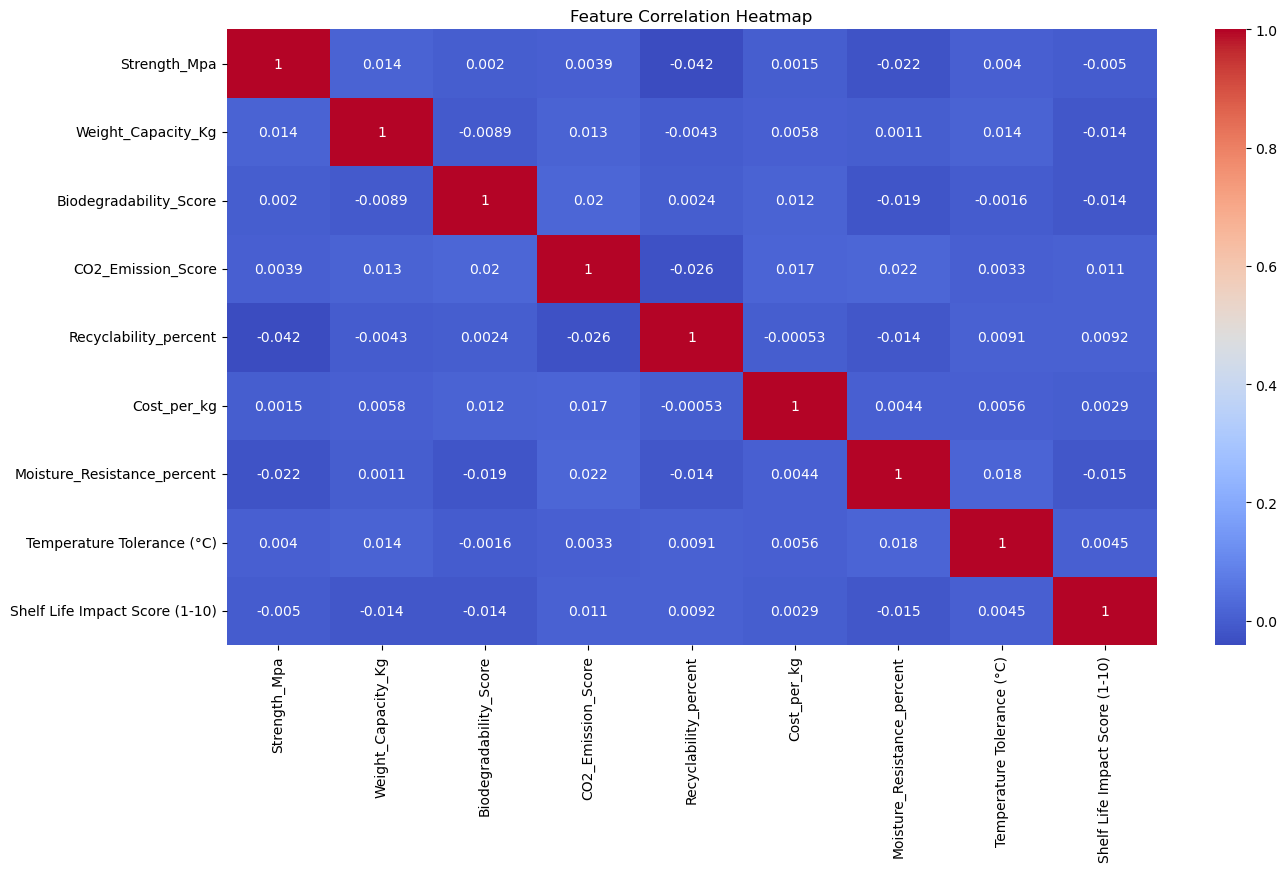

In [11]:
#Correlation Heatmap
plt.figure(figsize=(15,8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [12]:
df['Cost_per_kg'] = (
    0.35*df['Strength_Mpa'] +
    0.25*df['Weight_Capacity_Kg'] +
    0.2*df['Temperature Tolerance (°C)'] +
    0.1*df['Biodegradability_Score'] +
    0.1*df['Recyclability_percent']
)

## Normalize Numerical Data

In [13]:
# Columns to scale
scale_cols = ['Strength_Mpa', 'Weight_Capacity_Kg', 'CO2_Emission_Score', 'Cost_per_kg']
scaler = MinMaxScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

print("\nScaling Completed:")
df[scale_cols].head()


Scaling Completed:


,Strength_Mpa,Weight_Capacity_Kg,CO2_Emission_Score,Cost_per_kg
0,0.287561,0.377152,0.372269,0.372289
1,0.217175,0.294210,0.000000,0.439254
2,0.795117,0.424622,0.116141,0.715865
3,0.375079,0.144497,0.196938,0.503822
4,0.548684,0.496609,0.423470,0.600584


In [14]:
# ---------------------------------------
# FEATURE ENGINEERING
# ---------------------------------------
df["CO2_Impact_Index"] = 1 - df["CO2_Emission_Score"]

# log-transform cost efficiency to reduce skew
df["Cost_Efficiency_Index"] = np.log1p(1 / (df["Cost_per_kg"] + 1e-6))

# Weighted suitability score
df["Material_Suitability_Score"] = (
    0.3 * df["Strength_Mpa"] +
    0.2 * df["Weight_Capacity_Kg"] +
    0.3 * df["CO2_Impact_Index"] +
    0.2 * df["Cost_Efficiency_Index"]
)

# Initial ranking
df["Material_Rank"] = df["Material_Suitability_Score"].rank(ascending=False)

display(df[["CO2_Impact_Index","Cost_Efficiency_Index","Material_Suitability_Score","Material_Rank"]].head())


,CO2_Impact_Index,Cost_Efficiency_Index,Material_Suitability_Score,Material_Rank
0,0.627731,1.304562,0.610930,3429.0
1,1.000000,1.186801,0.661355,1818.0
2,0.883859,0.874180,0.763453,180.0
3,0.803062,1.093541,0.601050,3703.0
4,0.576530,0.980220,0.632930,2702.0


In [15]:
# ---------------------------------------
# OUTLIER DETECTION WITH COUNT AND PERCENTAGE
# ---------------------------------------

num_cols = df.select_dtypes(include=['float64', 'int64']).columns
outlier_summary = []

total_rows = df.shape[0]

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    count = outliers.shape[0]
    percentage = (count / total_rows) * 100
    
    outlier_summary.append([col, count, round(percentage, 2)])

# Convert to DataFrame for better visualization
outlier_df = pd.DataFrame(outlier_summary, columns=['Column', 'Outlier_Count', 'Outlier_Percentage'])
print(outlier_df)


                            Column  Outlier_Count  Outlier_Percentage
0                     Strength_Mpa             15                0.27
1               Weight_Capacity_Kg             25                0.45
2           Biodegradability_Score              0                0.00
3               CO2_Emission_Score             13                0.24
4            Recyclability_percent              0                0.00
5                      Cost_per_kg             20                0.36
6      Moisture_Resistance_percent              0                0.00
7       Temperature Tolerance (°C)             17                0.31
8   Shelf Life Impact Score (1-10)              0                0.00
9                 CO2_Impact_Index             13                0.24
10           Cost_Efficiency_Index            206                3.75
11      Material_Suitability_Score             68                1.24
12                   Material_Rank              0                0.00


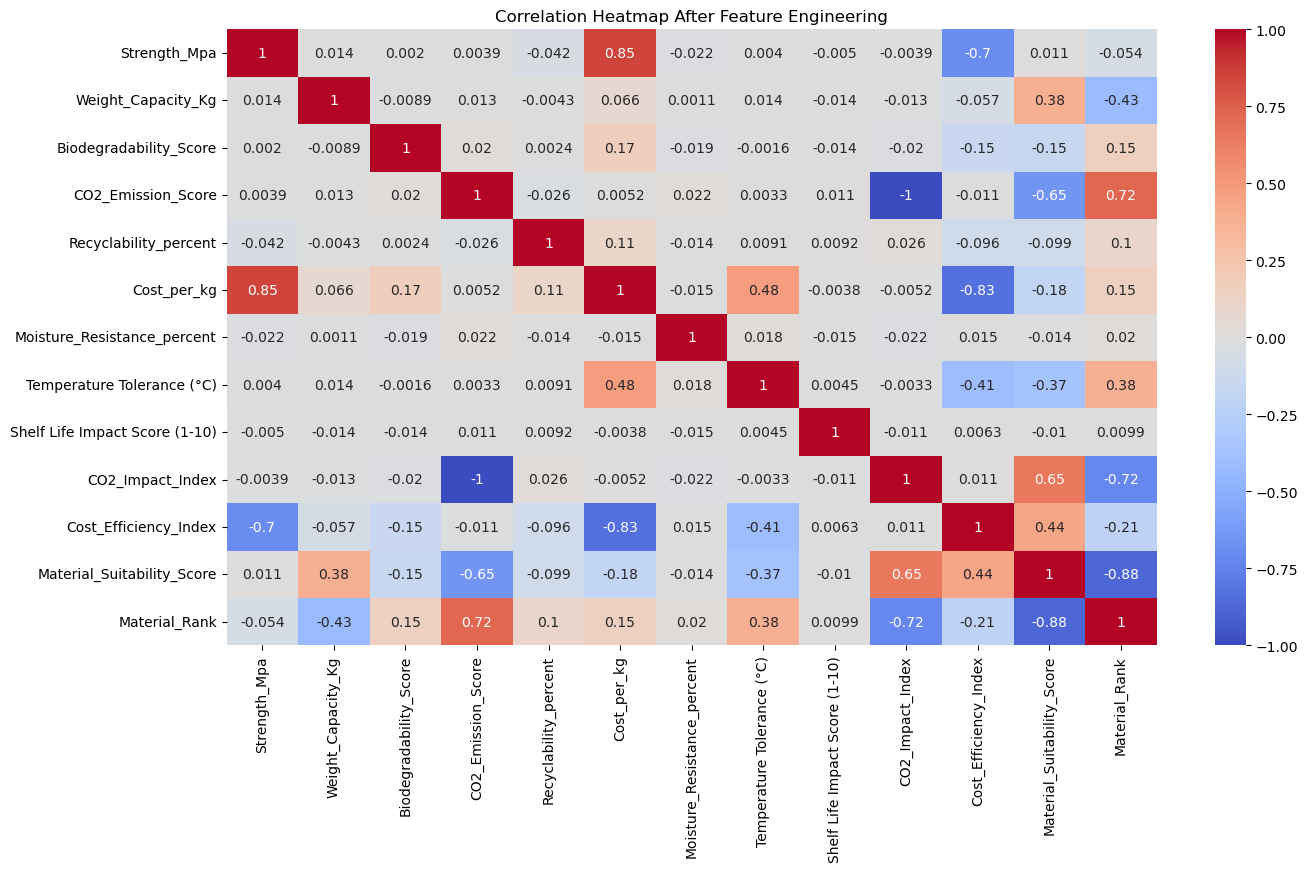

In [16]:
#Correlation Heatmap
plt.figure(figsize=(15,8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap After Feature Engineering")
plt.show()

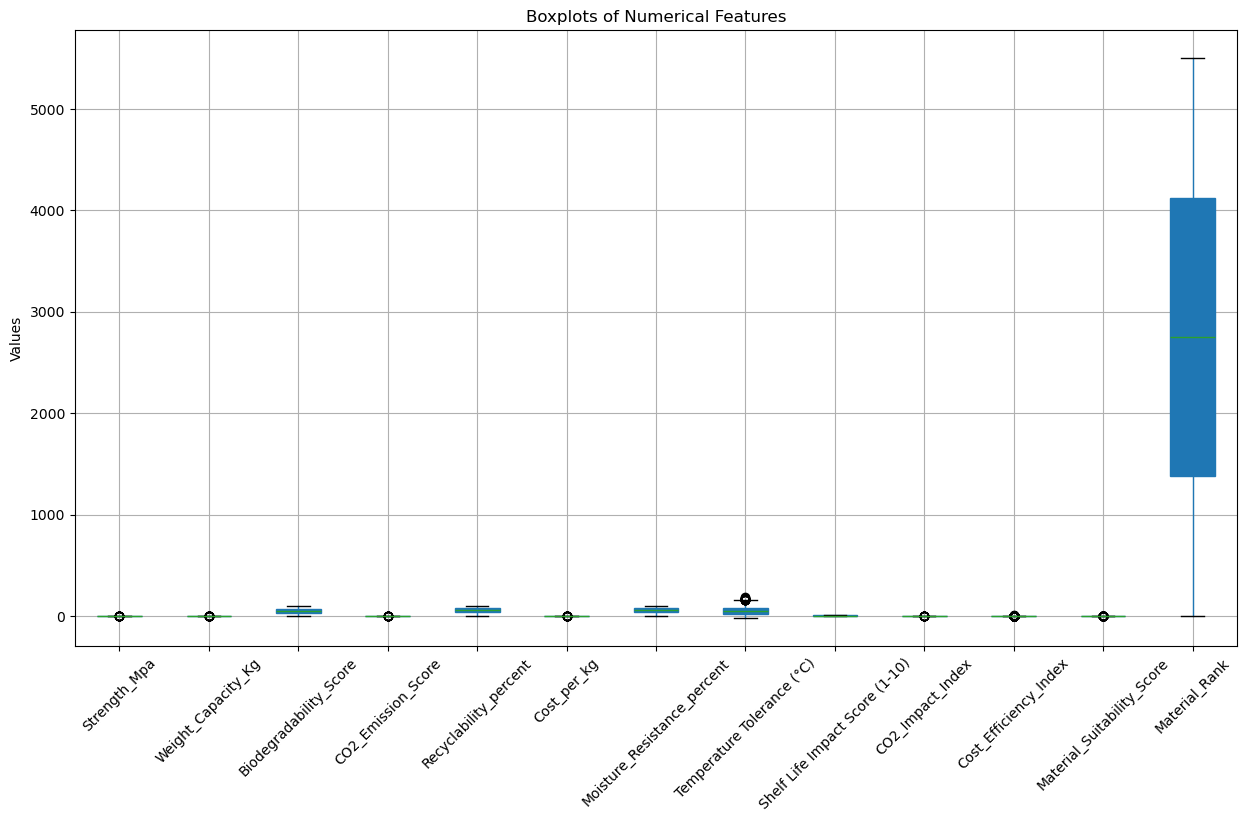

In [20]:
# ---------------------------------------
# BOXPLOTS OF NUMERICAL FEATURES
# ---------------------------------------
num_cols = df.select_dtypes(include=['float64','int64']).columns
plt.figure(figsize=(15,8))
df[num_cols].boxplot(patch_artist=True)
plt.title("Boxplots of Numerical Features")
plt.xticks(rotation=45)
plt.ylabel("Values")
plt.show()

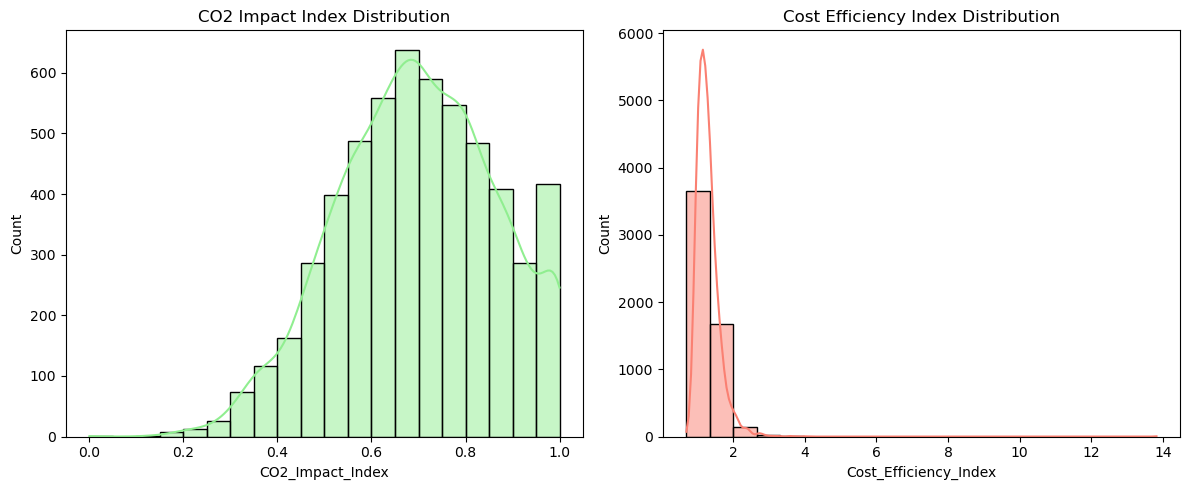

In [21]:
# ---------------------------------------
# DISTRIBUTION PLOTS
# ---------------------------------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df["CO2_Impact_Index"], bins=20, kde=True, color='lightgreen')
plt.title("CO2 Impact Index Distribution")

plt.subplot(1,2,2)
sns.histplot(df["Cost_Efficiency_Index"], bins=20, kde=True, color='salmon')
plt.title("Cost Efficiency Index Distribution")

plt.tight_layout()
plt.show()


In [22]:
num_cols = df.select_dtypes(include=['float64','int64']).columns

# Summary stats
num_summary = df[num_cols].describe().T  
print("\nNumerical Features Summary Statistics:")
num_summary



Numerical Features Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
Strength_Mpa,5500.0,0.335266,0.166817,0.000000,0.216007,0.331214,0.450831,1.000000
Weight_Capacity_Kg,5500.0,0.324338,0.168928,0.000000,0.203965,0.324465,0.438185,1.000000
Biodegradability_Score,5500.0,49.126073,26.834040,0.000000,29.500000,49.200000,68.700000,100.000000
CO2_Emission_Score,5500.0,0.302360,0.167917,0.000000,0.180688,0.301943,0.420459,1.000000
Recyclability_percent,5500.0,59.193109,22.659359,0.000000,43.600000,59.100000,75.900000,100.000000
Cost_per_kg,5500.0,0.416181,0.144496,0.000000,0.315491,0.412007,0.515169,1.000000
Moisture_Resistance_percent,5500.0,59.175836,22.366570,0.000000,44.000000,59.700000,75.200000,100.000000
Temperature Tolerance (°C),5500.0,50.303455,38.596386,-20.000000,22.875000,49.500000,76.500000,187.900000
Shelf Life Impact Score (1-10),5500.0,5.408000,2.600672,1.000000,3.000000,5.000000,7.000000,10.000000
CO2_Impact_Index,5500.0,0.697640,0.167917,0.000000,0.579541,0.698057,0.819312,1.000000


In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_cols = ['Material Type', 'Compostable (Yes/No)', 'Typical Food Use Case']

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

df[cat_cols].head()


,Material Type,Compostable (Yes/No),Typical Food Use Case
0,9,0,8
1,9,1,9
2,5,0,14
3,7,1,2
4,10,0,7


In [24]:
df.head()

,Material Type,Strength_Mpa,Weight_Capacity_Kg,Biodegradability_Score,CO2_Emission_Score,Recyclability_percent,Cost_per_kg,Moisture_Resistance_percent,Temperature Tolerance (°C),Compostable (Yes/No),Shelf Life Impact Score (1-10),Typical Food Use Case,CO2_Impact_Index,Cost_Efficiency_Index,Material_Suitability_Score,Material_Rank
0,9,0.287561,0.377152,12.8,0.372269,48.7,0.372289,56.5,67.6,0,3.0,8,0.627731,1.304562,0.610930,3429.0
1,9,0.217175,0.294210,78.1,0.000000,86.2,0.439254,44.0,85.1,1,8.0,9,1.000000,1.186801,0.661355,1818.0
2,5,0.795117,0.424622,42.6,0.116141,70.2,0.715865,68.8,23.0,0,3.0,14,0.883859,0.874180,0.763453,180.0
3,7,0.375079,0.144497,100.0,0.196938,36.2,0.503822,61.7,73.4,1,1.0,2,0.803062,1.093541,0.601050,3703.0
4,10,0.548684,0.496609,30.0,0.423470,31.4,0.600584,84.0,84.6,0,7.0,7,0.576530,0.980220,0.632930,2702.0


In [25]:
features = [
    'Strength_Mpa',
    'Weight_Capacity_Kg',
    'Temperature Tolerance (°C)',
    'Shelf Life Impact Score (1-10)',
    'Moisture_Resistance_percent',
    'Biodegradability_Score',
    'Recyclability_percent',
    'Material Type',
    'Compostable (Yes/No)',
    'CO2_Emission_Score'
]

X = df[features]
y_cost = df['Cost_per_kg']
y_co2  = df['CO2_Impact_Index']

In [26]:
#Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_cost_train, y_cost_test, y_co2_train, y_co2_test = train_test_split(
    X, y_cost, y_co2, test_size=0.2, random_state=42
)


In [27]:
#feature scaling
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [28]:
print("X_train shape:", X_train_scaled.shape)
print("X_test shape :", X_test_scaled.shape)

print("Median:", np.median(X_train_scaled, axis=0))
print("IQR:", np.percentile(X_train_scaled, 75, axis=0) - np.percentile(X_train_scaled, 25, axis=0))


X_train shape: (4400, 10)
X_test shape : (1100, 10)
Median: [ 0.00000000e+00  0.00000000e+00 -6.67868538e-17  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
IQR: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [29]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [30]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Metrics:")
    print("RMSE:", round(mean_squared_error(y_true, y_pred, squared=False), 5))
    print("MAE :", round(mean_absolute_error(y_true, y_pred), 5))
    print("R²  :", round(r2_score(y_true, y_pred), 5))


In [31]:
## Cost Prediction
rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=15,
    min_samples_split=2,
    random_state=42
)
rf.fit(X_train_scaled, y_cost_train)
y_cost_pred = rf.predict(X_test_scaled)
evaluate_model(y_cost_test, y_cost_pred, "Cost Prediction (RF)")



Cost Prediction (RF) Metrics:
RMSE: 0.01635
MAE : 0.01242
R²  : 0.98762


In [32]:
## Co2 Prediction
xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.03,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.9,
    objective='reg:squarederror',
    random_state=42
)
xgb.fit(X_train_scaled, y_co2_train)
y_co2_pred = xgb.predict(X_test_scaled)
evaluate_model(y_co2_test, y_co2_pred, "CO2 Prediction (XGBoost)")





CO2 Prediction (XGBoost) Metrics:
RMSE: 0.00261
MAE : 0.0012
R²  : 0.99978


In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest
rf = RandomForestRegressor(random_state=42)

# Parameter grid for tuning
param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [6, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Grid Search CV
grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

# Fit on combined training data for Cost prediction
grid_rf.fit(X_train_scaled, y_cost_train)

# Best parameters and score
print("Best RF params:", grid_rf.best_params_)
print("Best RF CV R²:", round(grid_rf.best_score_, 5))

# Use best RF model to predict
best_rf = grid_rf.best_estimator_
y_cost_pred = best_rf.predict(X_test_scaled)

# Evaluate
evaluate_model(y_cost_test, y_cost_pred, "Cost Prediction (RF - Tuned)")


Best RF params: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 500}
Best RF CV R²: 0.98531

Cost Prediction (RF - Tuned) Metrics:
RMSE: 0.01635
MAE : 0.01242
R²  : 0.98762


In [34]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [200, 300], 
    'learning_rate': [0.05, 0.1], 
    'max_depth': [4, 6]
}

# Grid Search CV
grid_xgb = GridSearchCV(
    estimator=XGBRegressor(random_state=42, objective='reg:squarederror'),
    param_grid=param_grid_xgb,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

# Fit on combined training data for CO2 prediction
grid_xgb.fit(X_train_scaled, y_co2_train)

# Best parameters and score
print("Best XGB params:", grid_xgb.best_params_)
print("Best XGB CV R²:", round(grid_xgb.best_score_, 5))

# Use best XGB model to predict
best_xgb = grid_xgb.best_estimator_
y_co2_pred = best_xgb.predict(X_test_scaled)

# Evaluate
evaluate_model(y_co2_test, y_co2_pred, "CO2 Prediction (XGBoost - Tuned)")


Best XGB params: {'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 200}
Best XGB CV R²: 0.99899

CO2 Prediction (XGBoost - Tuned) Metrics:
RMSE: 0.00349
MAE : 0.00101
R²  : 0.9996


In [35]:
from sklearn.preprocessing import MinMaxScaler

# Scale all features
X_scaled_full = scaler.transform(X)

# Use the fitted models to predict
df["Predicted_Cost"] = best_rf.predict(X_scaled_full)
df["Predicted_CO2"] = best_xgb.predict(X_scaled_full)

# Normalize predictions to 0-1 range for ranking
df["Predicted_Cost_Norm"] = MinMaxScaler().fit_transform(df[["Predicted_Cost"]])
df["Predicted_CO2_Norm"] = MinMaxScaler().fit_transform(df[["Predicted_CO2"]])

# Invert so lower is better
df["Cost_Score"] = 1 - df["Predicted_Cost_Norm"]
df["CO2_Score"]   = 1 - df["Predicted_CO2_Norm"]

# Combine into ranking score
df["Material_Ranking_Score"] = 0.5 * df["Cost_Score"] + 0.5 * df["CO2_Score"]

# Rank materials
df["Rank"] = df["Material_Ranking_Score"].rank(ascending=False)

# Sort and view top materials
df_sorted = df.sort_values(by="Material_Ranking_Score", ascending=False)
df_sorted[["Material Type", "Compostable (Yes/No)", "Predicted_Cost", "Predicted_CO2",
           "Material_Ranking_Score", "Rank"]].head(10)


,Material Type,Compostable (Yes/No),Predicted_Cost,Predicted_CO2,Material_Ranking_Score,Rank
1704,10,1,0.216674,0.004578,0.893293,1.0
4268,2,0,0.049858,0.344676,0.810611,2.0
13,1,0,0.201788,0.200186,0.802928,3.0
77,9,0,0.245245,0.158392,0.800964,4.0
4151,2,0,0.042811,0.382727,0.795225,5.0
1517,3,0,0.170153,0.254361,0.792431,6.0
3576,2,0,0.141171,0.289015,0.790336,7.0
3617,2,1,0.105288,0.329261,0.789076,8.0
4496,3,1,0.073214,0.414631,0.763147,9.0
4129,6,1,0.147682,0.336337,0.763133,10.0


In [39]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# COST MODEL
cost_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42
)
cost_model.fit(X_train_scaled, y_cost_train)

# CO2 MODEL
co2_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)
co2_model.fit(X_train_scaled, y_co2_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [40]:
import joblib

joblib.dump(cost_model, "cost_model.pkl")
joblib.dump(co2_model, "co2_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [41]:
import os
os.listdir()


['.ipynb_checkpoints',
 'co2_model.pkl',
 'cost_model.pkl',
 'ecopack_food_packaging.csv',
 'infosys.ipynb',
 'scaler.pkl']

In [42]:
joblib.load("cost_model.pkl").predict(X_train_scaled[:1])
joblib.load("co2_model.pkl").predict(X_train_scaled[:1])


array([0.9159378], dtype=float32)